In [ ]:
import tensorflow as tf

In [ ]:
# other imports
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Classsifier URL from TensorFlow Hub
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 
IMAGE_SHAPE = (224, 224)

In [ ]:
# create a model
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape = IMAGE_SHAPE+(3,))
])

In [ ]:
# set up URLs for image downloads
image_url1 = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch04/bulck_cart.jpg"
image_url2 = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch04/flower.jpg"
image_url3 = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch04/swordweapon.jpg"
image_url4 = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch04/tiger.jpg"
image_url5 = "https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch04/tree.jpg"

In [ ]:
# download images
!pip install wget
import wget 
wget.download(image_url1,'image1.jpg')
wget.download(image_url2,'image2.jpg')
wget.download(image_url3,'image3.jpg')
wget.download(image_url4,'image4.jpg')
wget.download(image_url5,'image5.jpg')

'image5.jpg'

In [ ]:
# load images and reshape to 224x224 required by the model
import PIL.Image as Image

image1 = tf.keras.utils.get_file("/content/image1.jpg", image_url1)
image1 = Image.open(image1).resize(IMAGE_SHAPE)
# scale the array
image1 = np.array(image1)/255.0

image2 = tf.keras.utils.get_file("/content/image2.jpg", image_url2)
image2 = Image.open(image2).resize(IMAGE_SHAPE)
image2 = np.array(image2)/255.0

image3 = tf.keras.utils.get_file("/content/image3.jpg", image_url3)
image3 = Image.open(image3).resize(IMAGE_SHAPE)
image3 = np.array(image3)/255.0

image4 = tf.keras.utils.get_file("/content/image4.jpg", image_url4)
image4 = Image.open(image4).resize(IMAGE_SHAPE)
image4 = np.array(image4)/255.0

image5 = tf.keras.utils.get_file("/content/image5.jpg", image_url5)
image5 = Image.open(image5).resize(IMAGE_SHAPE)
image5 = np.array(image5)/255.0

In [ ]:
# infer first image
result = classifier.predict(image1[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
# pick up the bottom most prediction
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

691

In [ ]:
# Load labels 
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [ ]:
print (imagenet_labels)
print ("Number of labels: " , len(imagenet_labels))

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']
Number of labels:  1001


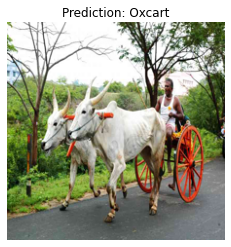

In [ ]:
# Show image and prediction
plt.imshow(image1)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# Predict and Display Function

In [ ]:
def predict_display_image(imagex):
  result = classifier.predict(imagex[np.newaxis, ...])
  predicted_class = np.argmax(result[0], axis=-1)
  plt.imshow(imagex)
  plt.axis('off')
  predicted_class_name = imagenet_labels[predicted_class]
  _ = plt.title("Prediction: " + predicted_class_name.title())

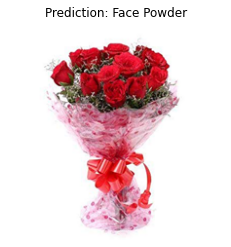

In [ ]:
# predict and print results for image2
predict_display_image(image2)

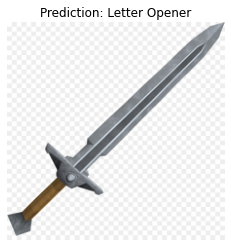

In [ ]:
# predict and print results for image3
predict_display_image(image3)

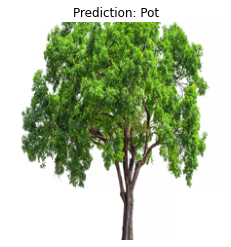

In [ ]:
# predict and print results for image4
predict_display_image(image4)

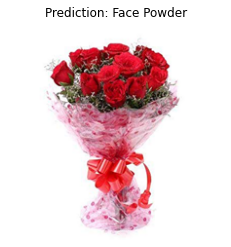

In [ ]:
# predict and print results for image5
predict_display_image(image5)

In [ ]:
# print the entire list of categories
for i in range (len(imagenet_labels)):
  print (imagenet_labels[i])

background
tench
goldfish
great white shark
tiger shark
hammerhead
electric ray
stingray
cock
hen
ostrich
brambling
goldfinch
house finch
junco
indigo bunting
robin
bulbul
jay
magpie
chickadee
water ouzel
kite
bald eagle
vulture
great grey owl
European fire salamander
common newt
eft
spotted salamander
axolotl
bullfrog
tree frog
tailed frog
loggerhead
leatherback turtle
mud turtle
terrapin
box turtle
banded gecko
common iguana
American chameleon
whiptail
agama
frilled lizard
alligator lizard
Gila monster
green lizard
African chameleon
Komodo dragon
African crocodile
American alligator
triceratops
thunder snake
ringneck snake
hognose snake
green snake
king snake
garter snake
water snake
vine snake
night snake
boa constrictor
rock python
Indian cobra
green mamba
sea snake
horned viper
diamondback
sidewinder
trilobite
harvestman
scorpion
black and gold garden spider
barn spider
garden spider
black widow
tarantula
wolf spider
tick
centipede
black grouse
ptarmigan
ruffed grouse
prairie chic